Predictive modelling of predefined dataset of high dimension using SVM modelling after normalization and feature extracton technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing predefined dataset Cancer Dataset

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
BC=load_breast_cancer()

Checking the data

In [9]:
print(BC['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

 *we can see that there are 30  independent features  and MIn -Max are varying for each feature.
    So its better to standardize and reduce dimensionality(using PC technique) before predictive modelling using SVM*

In [16]:
CDdf=pd.DataFrame(BC['data'],columns=BC['feature_names'])

In [19]:
CDdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalzing data using Standard scaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [23]:
mySS=StandardScaler()
mySS.fit(CDdf)
normCD=mySS.transform(CDdf)

In [24]:
normCDdf=pd.DataFrame(normCD,columns=BC['feature_names'])

In [25]:
normCDdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**feature Extraction Using PCA technique**

In [28]:
from sklearn.decomposition import PCA

In [32]:
myPCA=PCA(2)
myPCA.fit(normCDdf)
normFE_CD=myPCA.transform(normCDdf)

In [33]:
normFE_CDdf=pd.DataFrame(data=normFE_CD,columns=['PC1','PC2'])

In [35]:
normFE_CDdf.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


As we can see the dimensionality is reduced from 30 to 2 (PC1 And PC2), the most significant Components

Checking whether the Principal components was able to differentiate labels using plot

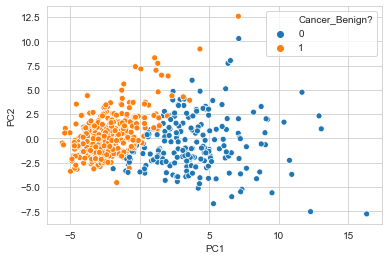

In [63]:
sns.set_style('whitegrid')
tempdf=pd.DataFrame(data=BC['target'],columns=['Cancer_Benign?'])
normFE_CDdf_with_label=normFE_CDdf.join(tempdf)
sns.scatterplot(x='PC1',y='PC2',data=normFE_CDdf_with_label,hue='Cancer_Benign?')

we can see that clear differention between the label values after reducing the dimensions to 2 using PCA. THis is huge advantage sice we can build over Predictive model on only these PCs instaed of 30 features

Understanding PC1 and PC2

In [64]:
myPCA.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

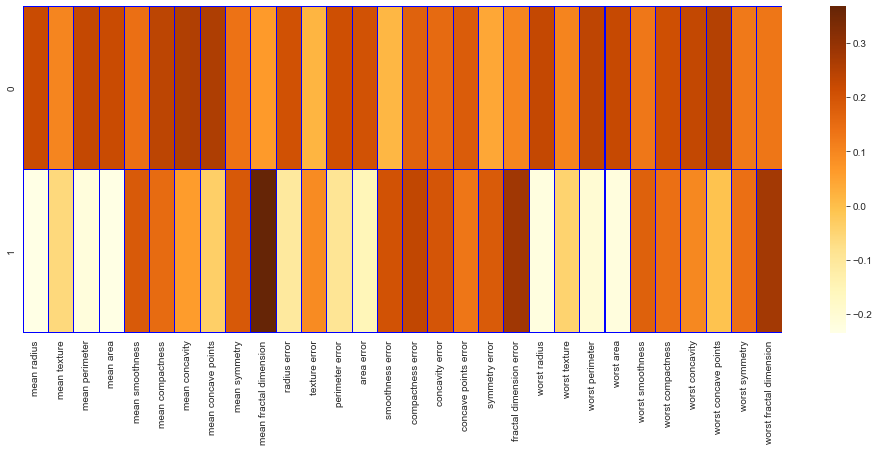

In [77]:
PCAdf=pd.DataFrame(myPCA.components_,columns=BC['feature_names'])
plt.figure(figsize=(17,6))
sns.heatmap(data=PCAdf,linewidth=0.05,linecolor='b',cmap='YlOrBr')

Predictive modelling using SVM grid method on all 3 datasets(original,normalized,Feature extracted)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

First on original dataset

In [97]:
ftrain1,ftest1,ltrain1,ltest1=train_test_split(CDdf,BC['target'],test_size=0.41,random_state=111)
paramgrid= {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
myGD_SVC1=GridSearchCV(SVC(),paramgrid,refit=True,verbose=1,cv=5)

In [98]:
myGD_SVC1.fit(ftrain1,ltrain1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [99]:
myGD_SVC1.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
predicted1=myGD_SVC1.predict(ftest1)

2) on Normalized data

In [122]:
ftrain2,ftest2,ltrain2,ltest2=train_test_split(normCDdf,BC['target'],test_size=0.41,random_state=111)
paramgrid= {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
myGD_SVC2=GridSearchCV(SVC(),paramgrid,refit=True,verbose=1,cv=5)

In [123]:
myGD_SVC2.fit(ftrain2,ltrain2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [124]:
myGD_SVC2.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
predicted2=myGD_SVC2.predict(ftest2)

3) On Feature extracted data using PCA

In [127]:
ftrain3,ftest3,ltrain3,ltest3=train_test_split(normFE_CDdf,BC['target'],test_size=0.41,random_state=111)
paramgrid= {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
myGD_SVC3=GridSearchCV(SVC(),paramgrid,refit=True,verbose=1,cv=5)

In [128]:
myGD_SVC3.fit(ftrain3,ltrain3)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [129]:
myGD_SVC3.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
predicted3=myGD_SVC3.predict(ftest3)

Evaluating each model performance using metrics

In [109]:
from sklearn import metrics

Original dataset modelling performance

In [111]:
print(metrics.classification_report(ltest1,predicted1))
print('\n')
print(metrics.confusion_matrix(ltest1,predicted1))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        92
           1       0.93      0.96      0.94       142

    accuracy                           0.93       234
   macro avg       0.93      0.92      0.92       234
weighted avg       0.93      0.93      0.93       234



[[ 81  11]
 [  6 136]]


Normalized dataset modelling performance

In [126]:
print(metrics.classification_report(ltest2,predicted2))
print('\n')
print(metrics.confusion_matrix(ltest2,predicted2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       1.00      0.99      0.99       142

    accuracy                           0.99       234
   macro avg       0.99      0.99      0.99       234
weighted avg       0.99      0.99      0.99       234



[[ 92   0]
 [  2 140]]


on Feature extracted (PCA) modelling performance

In [132]:
print(metrics.classification_report(ltest3,predicted3))
print('\n')
print(metrics.confusion_matrix(ltest3,predicted3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.99      0.94      0.96       142

    accuracy                           0.96       234
   macro avg       0.95      0.96      0.96       234
weighted avg       0.96      0.96      0.96       234



[[ 90   2]
 [  8 134]]


As we can see the PCA + SVM model works as good as SVM on original model with dimensions reduced from 30 to just 2